# Dection of text edge using Sobel 

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
# Read Image
img = cv2.imread('four.png')

In [3]:
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,15,15,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
cv2.imwrite("Denoising_1.jpg", rgb_dst)

True

# Sharping Image

In [4]:
imgIn = cv2.imread("Denoising_1.jpg", cv2.IMREAD_GRAYSCALE)

# Create the identity filter, but with the 1 shifted to the right!
#kernel = np.zeros( (9,9), np.float32)

#Identity, times two! 
#kernel[4,4] = 2.0   

# Create a box filter:
#boxFilter = np.ones( (9,9), np.float32) / 81.0

# Subtract the two:
#kernel = kernel - boxFilter

#sharp_1 = cv2.filter2D(imgIn, -1, kernel)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(imgIn, -1, kernel)

# save Result 
cv2.imwrite("sharp_1.jpg", im)

True

# Edge Detection

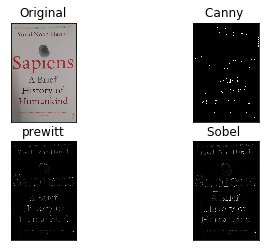

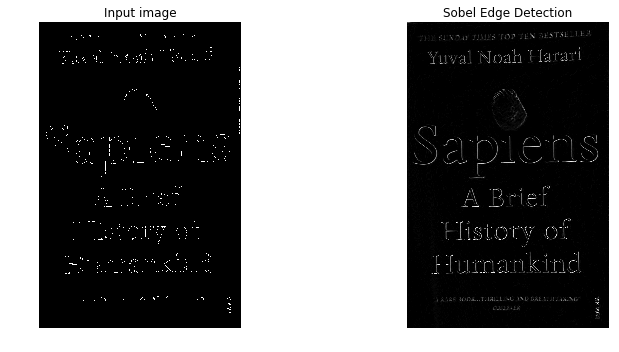

True

In [6]:



img = cv2.imread('Denoising_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#canny
img_canny = cv2.Canny(img,90,210)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewitty + img_prewittx


plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny '), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(12, 5))

ax[0].imshow(img_canny, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(img_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()
cv2.imwrite("SobelEdgeDetectionTest.jpg", img_sobel)

# Adaptive Mean thresholding

In [7]:
im_at_mean = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 11)

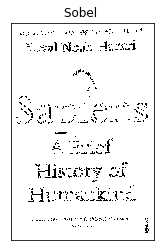

In [8]:
plt.subplot(1,1,1),plt.imshow(im_at_mean,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()

#  Adaptive Thresholding with gaussian weighted average

In [9]:
im_at_gauss = cv2.adaptiveThreshold(img_sobel, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5,7)

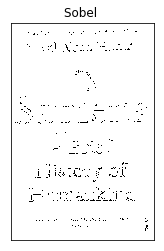

In [10]:
plt.subplot(1,1,1),plt.imshow(im_at_gauss,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()

# Fixed thresholding

In [11]:
retval, im_at_fixed = cv2.threshold(img_sobel, 40, 255, cv2.THRESH_BINARY)

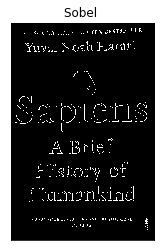

In [12]:
plt.subplot(1,1,1),plt.imshow(im_at_fixed,cmap = 'gray')
plt.title('Sobel '), plt.xticks([]), plt.yticks([])

plt.show()

# Dialation
